In [6]:
import os, sys

ruta_raiz = os.path.abspath("..")
if ruta_raiz not in sys.path:
    sys.path.append(ruta_raiz)

In [7]:
import numpy as np
import random
import torch
import torch.nn as nn
from collections import deque
from mpe2 import simple_tag_v3
import supersuit as ss
from NGUMultiAgent.NGUMulti import NGUMultiAgent
from NGU.DQN import DQN as NGU_DQN

In [8]:
class FakeEnv:
    def __init__(self, observation_space, action_space):
        self.observation_space = observation_space
        self.action_space = action_space

# Shared buffer

----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 224
|    time_elapsed     | 66
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 11.70 | loss: 0.0174 | eps: 0.933
| adversary_1 -> mean_ep_rew | 11.70 | loss: 0.0098 | eps: 0.933
| adversary_2 -> mean_ep_rew | 11.70 | loss: 0.0091 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 193
|    time_elapsed     | 155
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 16.30 | loss: 0.2539 | eps: 0.865
| adversary_1 -> mean_ep_rew | 16.30 | loss: 0.0160 | eps: 0.865
| adversary_2 -> mean_ep_rew | 16.30 | loss: 0.0242 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    fps           

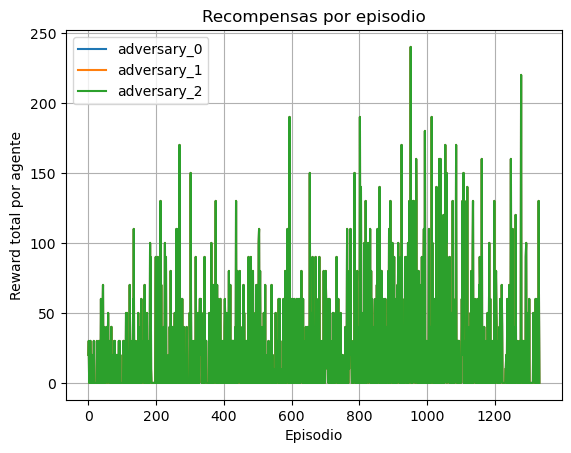

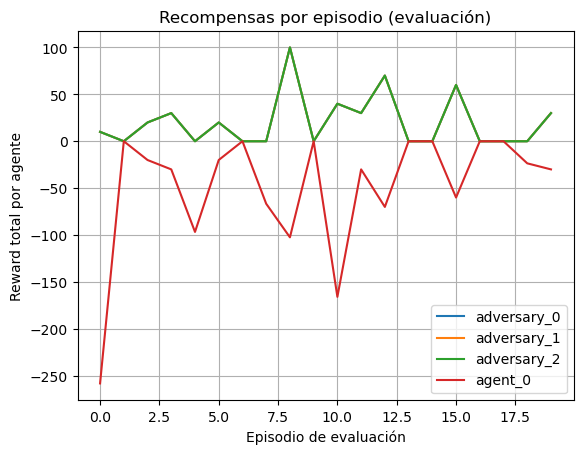

Video guardado en: demo_shared.mp4


In [ ]:
seed = 42
env = simple_tag_v3.parallel_env(render_mode='rgb_array', num_good=1, num_adversaries=3, num_obstacles=0, max_cycles=150, dynamic_rescaling = True)
env.reset(seed=seed)
agents = env.agents

base_params = dict(
    learning_rate = 0.001,
    buffer_size = 1000000,
    learning_starts = 5000,
    batch_size = 128,
    tau = 1.0,
    gamma = 0.99,
    train_freq = 16,
    gradient_steps = 4,
    target_update_interval = 2000,
    exploration_fraction = 0.1,
    exploration_initial_eps = 1,
    exploration_final_eps = 0.1,
    max_grad_norm = 10,
    verbose = 0,
    beta = 0.3
)


agent_dict = {
    agent: NGU_DQN(FakeEnv(env.observation_space(agent), env.action_space(agent)), **base_params)
    for agent in agents if agent.startswith("adversary")
}

trainer = NGUMultiAgent(env, agent_dict, total_timesteps=200_000, log_interval=100)
trainer.share_replay_buffer("adversary_0")  # Compartir el buffer de replay del primer agente adversario
trainer.learn()
trainer.plot_total_rewards()
trainer.evaluate(episodes=20)
trainer.render_and_save(num_tests=5, save_path="demo_shared.mp4", fps=5, max_steps=50)

----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 226
|    time_elapsed     | 66
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 10.80 | loss: 0.0914 | eps: 0.933
| adversary_1 -> mean_ep_rew | 10.80 | loss: 0.0813 | eps: 0.933
| adversary_2 -> mean_ep_rew | 10.80 | loss: 0.0803 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 193
|    time_elapsed     | 155
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 19.00 | loss: 0.1172 | eps: 0.865
| adversary_1 -> mean_ep_rew | 19.00 | loss: 0.0196 | eps: 0.865
| adversary_2 -> mean_ep_rew | 19.00 | loss: 0.0917 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    fps           

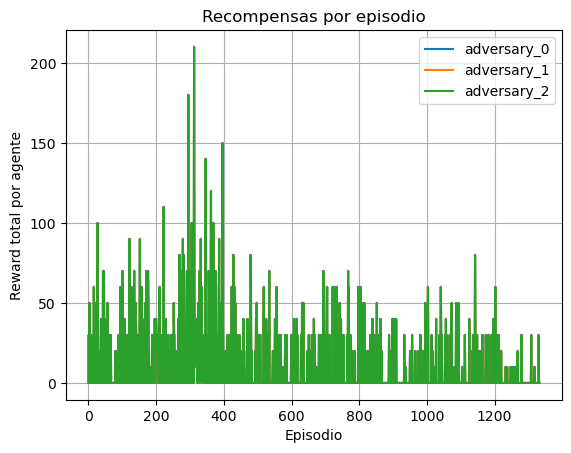

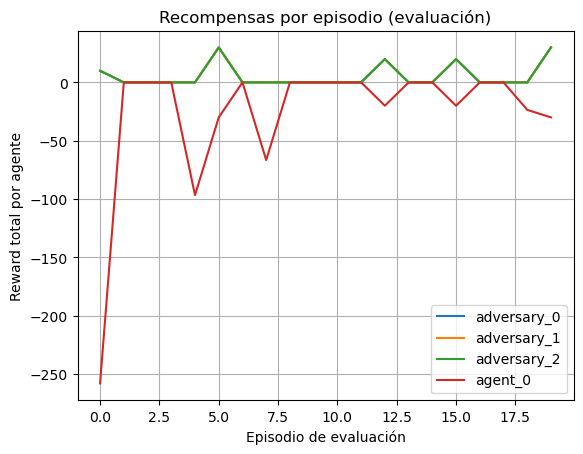

Video guardado en: demo_shared.mp4


In [ ]:
seed = 42
env = simple_tag_v3.parallel_env(render_mode='rgb_array', num_good=1, num_adversaries=3, num_obstacles=0, max_cycles=150, dynamic_rescaling = True)
env.reset(seed=seed)
agents = env.agents

base_params = dict(
    learning_rate = 0.001,
    buffer_size = 100000,
    learning_starts = 5000,
    batch_size = 128,
    tau = 1.0,
    gamma = 0.99,
    train_freq = 8,
    gradient_steps = 2,
    target_update_interval = 2000,
    exploration_fraction = 0.1,
    exploration_initial_eps = 1,
    exploration_final_eps = 0.1,
    max_grad_norm = 10,
    verbose = 0,
    beta = 0.3
)

agent_dict = {
    agent: NGU_DQN(FakeEnv(env.observation_space(agent), env.action_space(agent)), **base_params)
    for agent in agents if agent.startswith("adversary")
}

trainer = NGUMultiAgent(env, agent_dict, total_timesteps=200_000, log_interval=100)
trainer.share_replay_buffer("adversary_0")  # Compartir el buffer de replay del primer agente adversario
trainer.learn()
trainer.plot_total_rewards()
trainer.evaluate(episodes=20)
trainer.render_and_save(num_tests=5, save_path="demo_shared.mp4", fps=5, max_steps=50)

## Buenos parámetros

----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 204
|    time_elapsed     | 73
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 10.20 | loss: 0.0037 | eps: 0.933
| adversary_1 -> mean_ep_rew | 10.20 | loss: 0.0011 | eps: 0.933
| adversary_2 -> mean_ep_rew | 10.20 | loss: 0.2199 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 177
|    time_elapsed     | 168
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 13.60 | loss: 0.0771 | eps: 0.865
| adversary_1 -> mean_ep_rew | 13.60 | loss: 0.0790 | eps: 0.865
| adversary_2 -> mean_ep_rew | 13.60 | loss: 0.0139 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    fps           

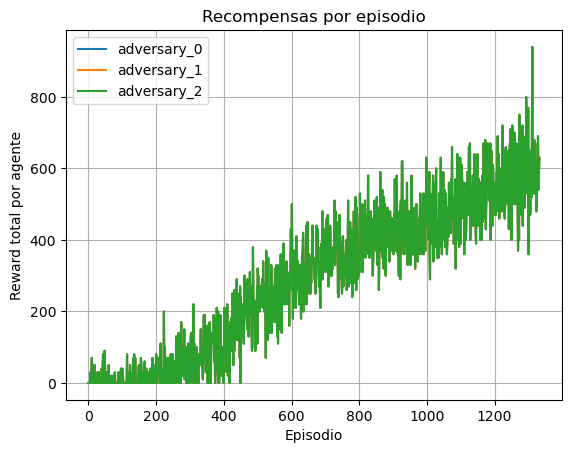

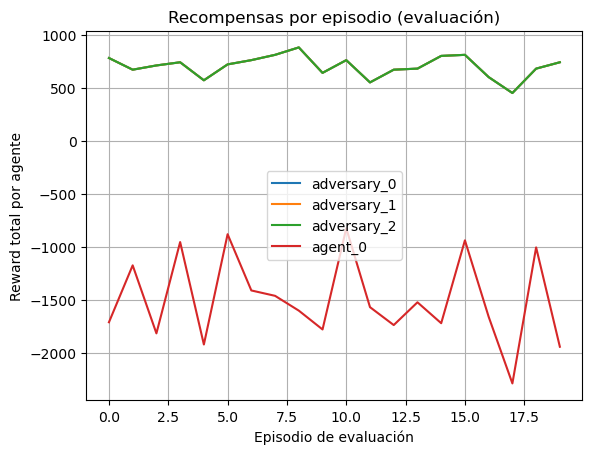

Video guardado en: demo_shared_def.mp4


In [15]:
seed = 42
env = simple_tag_v3.parallel_env(render_mode='rgb_array', num_good=1, num_adversaries=3, num_obstacles=0, max_cycles=150, dynamic_rescaling = True)
env.reset(seed=seed)
agents = env.agents

base_params = dict(
    learning_rate = 0.001,
    buffer_size = 1000000,
    learning_starts = 5000,
    batch_size = 128,
    tau = 1.0,
    gamma = 0.99,
    train_freq = 16,
    gradient_steps = 4,
    target_update_interval = 2000,
    exploration_fraction = 0.1,
    exploration_initial_eps = 1,
    exploration_final_eps = 0.1,
    max_grad_norm = 10,
    verbose = 0,
    beta = 0.1
)

agent_dict = {
    agent: NGU_DQN(FakeEnv(env.observation_space(agent), env.action_space(agent)), **base_params)
    for agent in agents if agent.startswith("adversary")
}

trainer = NGUMultiAgent(env, agent_dict, total_timesteps=200_000, log_interval=100)
trainer.share_replay_buffer("adversary_0")  # Compartir el buffer de replay del primer agente adversario
trainer.learn()
trainer.plot_total_rewards()
trainer.evaluate(episodes=20)
trainer.render_and_save(num_tests=5, save_path="demo_shared_def.mp4", fps=5, max_steps=50)

# Parameter sharing

----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 204
|    time_elapsed     | 73
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 13.90 | loss: 0.0423 | eps: 0.933
| adversary_1 -> mean_ep_rew | 13.90 | loss: 0.0423 | eps: 0.933
| adversary_2 -> mean_ep_rew | 13.90 | loss: 0.0423 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 177
|    time_elapsed     | 169
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 20.70 | loss: 0.2053 | eps: 0.865
| adversary_1 -> mean_ep_rew | 20.70 | loss: 0.2053 | eps: 0.865
| adversary_2 -> mean_ep_rew | 20.70 | loss: 0.2053 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    fps           

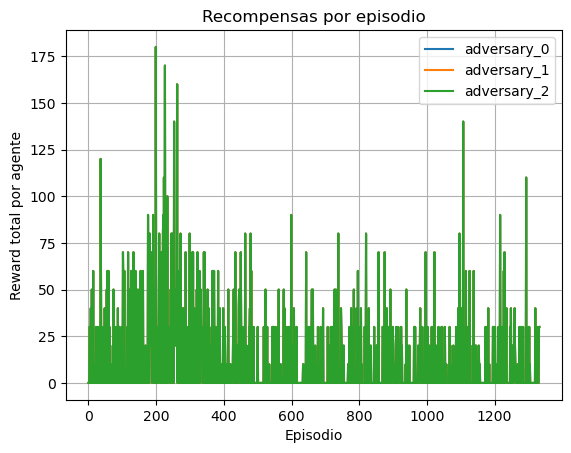

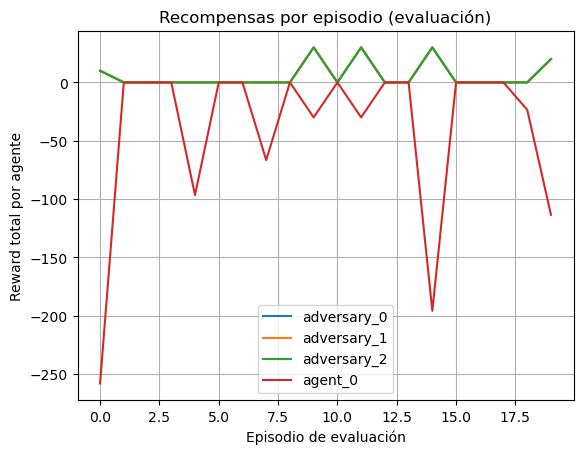

Video guardado en: demo_shared_2.mp4


In [10]:
seed = 42
env = simple_tag_v3.parallel_env(render_mode='rgb_array', num_good=1, num_adversaries=3, num_obstacles=0, max_cycles=150, dynamic_rescaling = True)
env.reset(seed=seed)
agents = env.agents

base_params = dict(
    learning_rate = 0.001,
    buffer_size = 1000000,
    learning_starts =5000,
    batch_size = 128,
    tau = 1.0,
    gamma = 0.99,
    train_freq = 16,
    gradient_steps = 4,
    target_update_interval = 2000,
    exploration_fraction = 0.1,
    exploration_initial_eps = 1,
    exploration_final_eps = 0.1,
    max_grad_norm = 10,
    verbose = 0,
    beta = 0.3
)


reference_agent = NGU_DQN(FakeEnv(env.observation_space("adversary_0"), env.action_space("adversary_0")), **base_params)
agent_dict = {
    agent: reference_agent
    for agent in agents if agent.startswith("adversary")
}

trainer = NGUMultiAgent(env, agent_dict, total_timesteps=200_000, log_interval=100)
# Ya se comparte porque son misma instancia
# trainer.share_replay_buffer("adversary_0")
trainer.learn()
trainer.plot_total_rewards()
trainer.evaluate(episodes=20)
trainer.render_and_save(num_tests=5, save_path="demo_shared_2.mp4", fps=5, max_steps=50)

----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 101
|    time_elapsed     | 147
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 14.10 | loss: 0.2659 | eps: 0.929
| adversary_1 -> mean_ep_rew | 14.10 | loss: 0.2659 | eps: 0.929
| adversary_2 -> mean_ep_rew | 14.10 | loss: 0.2659 | eps: 0.929
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 97
|    time_elapsed     | 307
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 9.10 | loss: 1.9243 | eps: 0.858
| adversary_1 -> mean_ep_rew | 9.10 | loss: 1.9243 | eps: 0.858
| adversary_2 -> mean_ep_rew | 9.10 | loss: 1.9243 | eps: 0.858
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    fps              

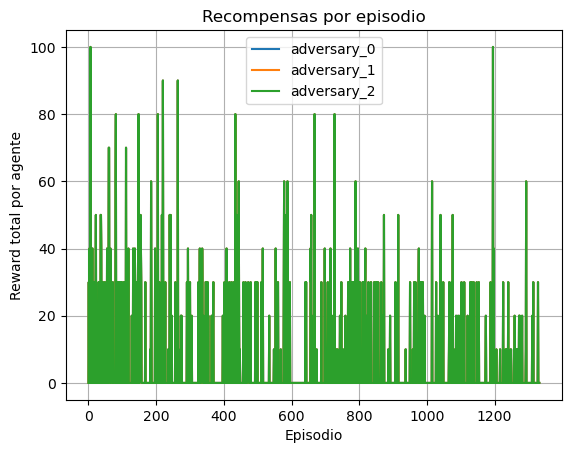

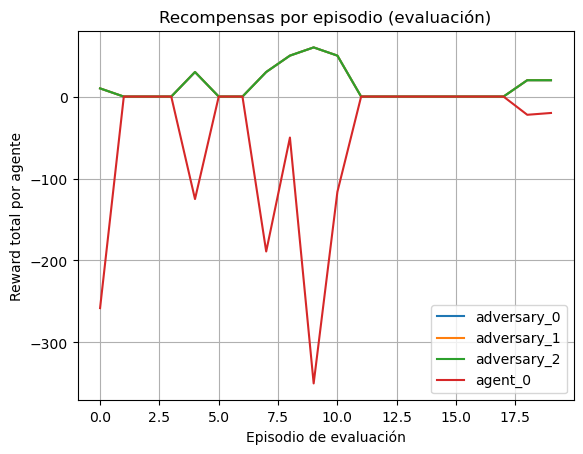

Video guardado en: demo_shared_3.mp4


In [ ]:
seed = 42
env = simple_tag_v3.parallel_env(render_mode='rgb_array', num_good=1, num_adversaries=3, num_obstacles=0, max_cycles=150, dynamic_rescaling = True)
env.reset(seed=seed)
agents = env.agents

base_params = dict(
    learning_rate = 3e-4,                  # más conservador
    buffer_size = 100_000,                # tamaño razonable para evitar lentitud
    learning_starts = 1_000,              # empieza a aprender más pronto
    batch_size = 128,
    tau = 1,                          # soft update más estable
    gamma = 0.99,
    train_freq = 8,                       # más frecuente
    gradient_steps = 4,
    target_update_interval = 1000,           # se usa junto con `tau` pequeño
    exploration_fraction = 0.2,           # da más tiempo para explorar
    exploration_initial_eps = 1.0,
    exploration_final_eps = 0.05,
    max_grad_norm = 5,
    verbose = 0,
    beta = 0.3                            # más énfasis en exploración
)

reference_agent = NGU_DQN(FakeEnv(env.observation_space("adversary_0"), env.action_space("adversary_0")), **base_params)
agent_dict = {
    agent: reference_agent
    for agent in agents if agent.startswith("adversary")
}

trainer = NGUMultiAgent(env, agent_dict, total_timesteps=200_000, log_interval=100)
# Ya se comparte porque son misma instancia
# trainer.share_replay_buffer("adversary_0")
trainer.learn()
trainer.plot_total_rewards()
trainer.evaluate(episodes=20)
trainer.render_and_save(num_tests=5, save_path="demo_shared_3.mp4", fps=5, max_steps=50)